Use QuTiP Python package to simulate spin echo sequences for an ensemble of noisy spins on Bloch sphere.

1. Execute regular Ramsey sequence for ensemble of spins that are noisy during free evolution.
2. Execute Ramsey spin echo sequence for an ensemble of spins that are noisy during free evolution.

Compare their coherences by varying the phase of the second pi/2 pulse and observing the contrast.

3. Execute regular Rabi sequence for ensemble of spins that are noisy during free evolution.
4. Execute Rabi spin echo sequence for an ensemble of spins that are noisy.

In [1]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

#two-level system dynamics. Assume quantization axis is along z-axis.
ket_g = basis(2,0) #|up> = |g> in a two-level system
ket_e = basis(2,1) #|down> = |e> in a two-level system

In [2]:
#execute regular Ramsey sequence for ensemble of spins that are noisy during free evolution.
#assume no detuning during pi/2 pulses. assume noisy detuning during free evolution.

n = 100 #number of spins
delta_0 = 0.1 #average detuning
delta_sigma = 0.2 #standard deviation of detuning
delta = np.random.normal(delta_0, delta_sigma, n) #normal distribution of detunings
rabi = 1.0 #rabi frequency
phi = 0.0*np.pi #phase of rabi frequency
ket_init = ket_g

result1 = []
result2 = []
result3 = []

for i in range(n):
    #first pi/2 pulse
    H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
    pulse = np.pi/(2*rabi)
    t = np.linspace(0, pulse, 100)
    result1.append(sesolve(H, ket_init, t, e_ops=[]))
    ket_intermediate = result1[i].states[-1]

    #free evolution
    H = delta[i]*sigmaz()/2
    free = 25*pulse
    T = np.linspace(0, free, 100)
    result2.append(sesolve(H, ket_intermediate, T, e_ops=[]))
    ket_intermediate2 = result2[i].states[-1]

    #second pi/2 pulse
    H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    result3.append(sesolve(H, ket_intermediate2, t, e_ops=[]))
    ket_final = result3[i].states[-1]

In [3]:
#animate the above result on the Bloch sphere

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        if i < len(result1[j].states):
            state = result1[j].states[i]
        elif i < len(result2[j].states) + len(result2[j].states):
            state = result2[j].states[i - len(result2[j].states)]
        else:
            state = result3[j].states[i - len(result3[j].states) - len(result3[j].states)]
        
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(result1[0].states) + len(result2[0].states) + len(result3[0].states)), init_func=init, blit=False, repeat=False)
ani.save('ramsey_noisy_ensemble.mp4', fps=50, writer='ffmpeg')


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

<Figure size 640x480 with 0 Axes>

Clearly detuning noise screws up the Ramsey sequence. Let's see how the spin echo sequence does.

In [4]:
#execute a simple spin echo sequence for the same ensemble of noisy spins above.

result1 = []
result2 = []
result3 = []
result4 = []
result5 = []

for i in range(n):
    #first pi/2 pulse in x
    phi = 0.0*np.pi
    H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
    pulse = np.pi/(2*rabi)
    t = np.linspace(0, pulse, 100)
    result1.append(sesolve(H, ket_init, t, e_ops=[]))
    ket_intermediate = result1[i].states[-1]

    #free evolution
    H = delta[i]*sigmaz()/2
    free = 25*pulse
    T = np.linspace(0, free, 100)
    result2.append(sesolve(H, ket_intermediate, T, e_ops=[]))
    ket_intermediate2 = result2[i].states[-1]

    #spin echo pi pulse in x
    phi = 0.0*np.pi
    H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    result3.append(sesolve(H, ket_intermediate2, t, e_ops=[]))
    ket_intermediate3 = result3[i].states[-1]

    #free evolution again for same amount of time
    H = delta[i]*sigmaz()/2
    free = 25*pulse
    T = np.linspace(0, free, 100)
    result4.append(sesolve(H, ket_intermediate3, T, e_ops=[]))
    ket_intermediate4 = result4[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi
    H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    result5.append(sesolve(H, ket_intermediate4, t, e_ops=[]))
    ket_final = result5[i].states[-1]

/var/folders/31/m4kzls1x2ms3ys1t245y77j80000gn/T/ipykernel_17667/4230288494.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


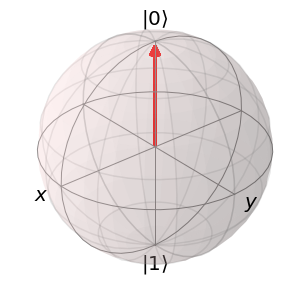

In [ ]:
#animate the above result on the Bloch sphere

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        if i < len(result1[j].states):
            state = result1[j].states[i]
        elif i < len(result2[j].states) + len(result2[j].states):
            state = result2[j].states[i - len(result2[j].states)]
        elif i < len(result3[j].states) + len(result3[j].states) + len(result3[j].states):
            state = result3[j].states[i - len(result3[j].states) - len(result3[j].states)]
        elif i < len(result4[j].states) + len(result4[j].states) + len(result4[j].states) + len(result4[j].states):
            state = result4[j].states[i - len(result4[j].states) - len(result4[j].states) - len(result4[j].states)]
        else:
            state = result5[j].states[i - len(result5[j].states) - len(result5[j].states) - len(result5[j].states) - len(result5[j].states)]
        
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(result1[0].states) + len(result2[0].states) + len(result3[0].states) + len(result4[0].states) + len(result5[0].states)), init_func=init, blit=False, repeat=False)
ani.save('ramsey_spin_echo.mp4', fps=50, writer='ffmpeg')

we see that the spin echo sequence succeeds in "canceling out" the noise accrued during free evolution, leading to a clean measurement in the end. for a perfect spin echo, this completely solves the issue of noise during free evolution. any remaining decoherence must be due to other types of dephasing.

Now, let's verify that spin echo indeed improves Ramsey coherence.
Assume that external field fluctuation causes fluctuations in detuning during the free evolution phase.
For a non-spin echo sequence, this means that if the 2nd pi/2 pulse is along angle theta, there should be decreased contrast in the interference fringe (decreasing as wait time is increased). For a perfect spin-echo sequence, there is maximal contrast. 

In [5]:
#plot Ramsey coherence of ensemble of spins with no spin echo, noise during free evolution.

n = 250 #number of spins
delta_0 = 0.1 #average detuning
delta_sigma = 0.1*delta_0 #standard deviation of detuning
delta = np.random.normal(delta_0, delta_sigma, n) #normal distribution of detunings
pulse = np.pi/(2*rabi) #pi/2 pulse duration
free = 100*pulse #wait time
rabi = 1.0 #rabi frequency
phase = np.linspace(-np.pi, np.pi, 100) #phase of second pi/2 pulse
ket_init = ket_g

#note that result5 holds the expectation value of z in the final state
result1, result2, result3, = [[] for _ in range(n)], [[] for _ in range(n)], [[] for _ in range(n)]

for i in range(n):
    for index, phi in enumerate(phase):
        #first pi/2 pulse in x
        H = rabi*sigmax()/2
        t = np.linspace(0, pulse, 2)
        result1[i].append(sesolve(H, ket_init, t, e_ops=[]))
        ket_intermediate1 = result1[i][index].states[-1]

        #free evolution
        H = delta[i]*sigmaz()/2
        T = np.linspace(0, free, 2)
        result2[i].append(sesolve(H, ket_intermediate1, T, e_ops=[]))
        ket_intermediate2 = result2[i][index].states[-1]

        #second pi/2 pulse in angle theta
        H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
        t = np.linspace(0, pulse, 2)
        result3[i].append(sesolve(H, ket_intermediate2, t, e_ops=[sigmaz()]))

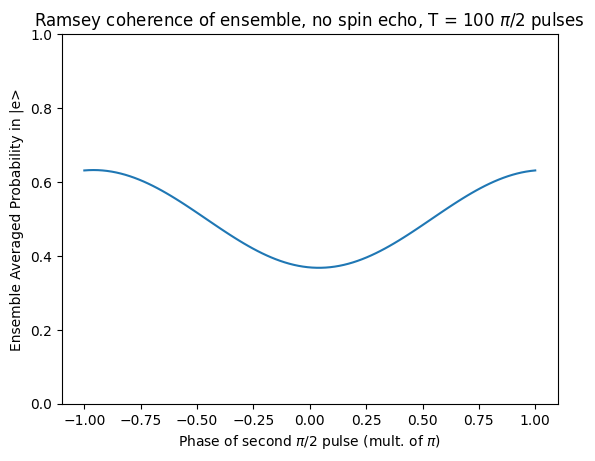

<Figure size 640x480 with 0 Axes>

In [6]:
#ensemble average at each free time over the ensemble of spins
p_e = [[1/2*(1-result3[i][j].expect[0][-1]) for j in range(len(result3[0]))] for i in range(len(result3))]
avg_p_e = np.mean(p_e, axis=0)
plt.plot(phase/np.pi, avg_p_e)
plt.xlabel('Phase of second $\pi/2$ pulse (mult. of $\pi$)')
plt.ylabel('Ensemble Averaged Probability in |e>')
plt.ylim(0, 1)
plt.title('Ramsey coherence of ensemble, no spin echo, T = 100 $\pi/2$ pulses')
plt.show()
plt.savefig('ramsey_coherence_no_echo_100pulses.png')

In [7]:
#plot the Ramsey coherence of a spin echo sequence. To visualize this, vary the phase of second pi/2 pulse
#the contrast in the fringe is maximal for all wait times if the spin echo is perfect, which implies infinite coherence.


n = 250 #number of spins
delta_0 = 0.1 #average detuning
delta_sigma = 0.1*delta_0 #standard deviation of detuning
delta = np.random.normal(delta_0, delta_sigma, n) #normal distribution of detunings
pulse = np.pi/(2*rabi) #pi/2 pulse duration
free = 100*pulse #wait time
rabi = 1.0 #rabi frequency
phase = np.linspace(-np.pi, np.pi, 100) #phase of second pi/2 pulse
ket_init = ket_g

#note that result5 holds the expectation value of z in the final state
result1, result2, result3, result4, result5 = [[] for _ in range(n)], [[] for _ in range(n)], [[] for _ in range(n)], [[] for _ in range(n)], [[] for _ in range(n)]

for i in range(n):
    for index, phi in enumerate(phase):
        #first pi/2 pulse in x
        H = rabi*sigmax()/2
        t = np.linspace(0, pulse, 2)
        result1[i].append(sesolve(H, ket_init, t, e_ops=[]))
        ket_intermediate1 = result1[i][index].states[-1]

        #free evolution
        H = delta[i]*sigmaz()/2
        T = np.linspace(0, free/2, 2)
        result2[i].append(sesolve(H, ket_intermediate1, T, e_ops=[]))
        ket_intermediate2 = result2[i][index].states[-1]

        #spin echo pi pulse in x
        H = rabi*sigmax()/2
        t = np.linspace(0, 2*pulse, 2)
        result3[i].append(sesolve(H, ket_intermediate2, t, e_ops=[]))
        ket_intermediate3 = result3[i][index].states[-1]

        #free evolution again for same amount of time
        H = delta[i]*sigmaz()/2
        T = np.linspace(0, free/2, 2)
        result4[i].append(sesolve(H, ket_intermediate3, T, e_ops=[]))
        ket_intermediate4 = result4[i][index].states[-1]

        #second pi/2 pulse in angle theta
        H = rabi*sigmax()*np.cos(phi)/2 + rabi*sigmay()*np.sin(phi)/2
        t = np.linspace(0, pulse, 2)
        result5[i].append(sesolve(H, ket_intermediate4, t, e_ops=[sigmaz()]))


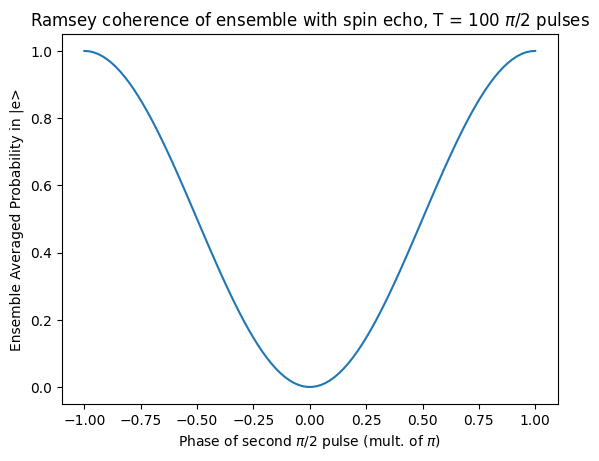

<Figure size 640x480 with 0 Axes>

In [8]:
#ensemble average at each free time over the ensemble of spins
p_e = [[1/2*(1-result5[i][j].expect[0][-1]) for j in range(len(result5[0]))] for i in range(len(result5))]
avg_p_e = np.mean(p_e, axis=0)
plt.plot(phase/np.pi, avg_p_e)
plt.xlabel('Phase of second $\pi/2$ pulse (mult. of $\pi$)')
plt.ylabel('Ensemble Averaged Probability in |e>')
plt.title('Ramsey coherence of ensemble with spin echo, T = 100 $\pi/2$ pulses')
plt.show()
plt.savefig('ramsey_coherence_yes_echo_100pulses.png')


We conclude that spin echo is indeed better for maintaining coherence of a Ramsey sequence where there's external field noise that affects the free precession.

Next, we calculate usefulness of spin echo for Rabi sequences, where the noise is in the drive itself (and not during any free precession due to external fields).

In [9]:
#test how to animate multiple Bloch vectors with gaussian distribution of rabi frequencies on Bloch sphere

n = 250 #number of spins
delta = 0.0 #detuning in units of rabi frequency
rabi0 = 1.0
rabi_sigma = 0.1*rabi0
rabi = np.random.normal(rabi0, rabi_sigma, n)
phi = 0.0*np.pi #phase of rabi frequency
ket_init = ket_g
results = []
results1 = []

"""
# Plot the histogram of Rabi frequencies
plt.hist(rabi, bins='auto', edgecolor='black')
plt.xlabel('Rabi frequency')
plt.ylabel('Count')
plt.title('Rabi frequency distribution')
plt.show()
"""

for i in range(n):
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2.0*np.pi, 100)
    results.append(sesolve(H, ket_g, t, e_ops=[]))
    t1 = np.linspace(0, 6.0*np.pi, 500)
    results1.append(sesolve(H, ket_g, t1, e_ops=[sigmaz()]))

/var/folders/31/m4kzls1x2ms3ys1t245y77j80000gn/T/ipykernel_29038/3001949776.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


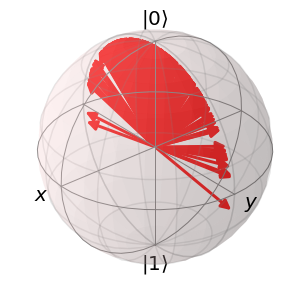

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        state = results[j].states[i]
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, len(t), init_func=init, blit=False, repeat=False)
ani.save('rabi_noisy_ensemble.mp4', fps=20, writer='ffmpeg')

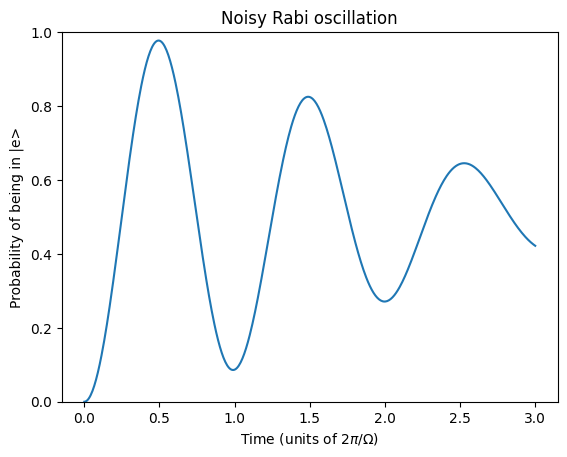

<Figure size 640x480 with 0 Axes>

In [10]:
#For the same Rabi cycle, plot probability of being in |e> as function of time

p_e_values = [1/2*(1 - answers.expect[0]) for answers in results1]
avg_p_e = np.mean(p_e_values, axis=0)

plt.plot(t1/(2*np.pi), avg_p_e)
plt.xlabel('Time (units of 2$\pi$/$\Omega$)')
plt.ylabel('Probability of being in |e>')
plt.title('Noisy Rabi oscillation')
plt.ylim([0,1])
plt.show()
plt.savefig('rabi_coherence_no_echo.png')

In [11]:
#single rabi spin echo XYX with no decoherence in the Y pulse. This is the "idealized" case

n = 250 #number of spins
delta = 0.0 #detuning in units of rabi frequency
rabi0 = 1.0
rabi_sigma = 0.1*rabi0
rabi = np.random.normal(rabi0, rabi_sigma, n)
phi = 0.0*np.pi #phase of rabi frequency
pulse = np.pi/(2*rabi0)
ket_init = ket_g
results = []
results1 = []
results2 = []

"""
# Plot the histogram of Rabi frequencies
plt.hist(rabi, bins='auto', edgecolor='black')
plt.xlabel('Rabi frequency')
plt.ylabel('Count')
plt.title('Rabi frequency distribution')
plt.show()
"""

for i in range(n):
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate = results[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi0*sigmax()*np.cos(phi)/2 + rabi0*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    results1.append(sesolve(H, ket_intermediate, t, e_ops=[]))
    ket_intermediate1 = results1[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results2.append(sesolve(H, ket_intermediate1, t, e_ops=[]))

/var/folders/31/m4kzls1x2ms3ys1t245y77j80000gn/T/ipykernel_29038/980622930.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


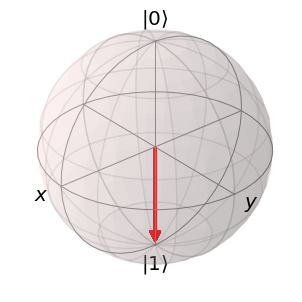

In [ ]:
#animate the results above on the Bloch sphere

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        if i < len(results[j].states):
            state = results[j].states[i]
        elif i < len(results[j].states) + len(results1[j].states):
            state = results1[j].states[i - len(results[j].states)]
        else:
            state = results2[j].states[i - len(results[j].states) - len(results1[j].states)]
        
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(results[0].states) + len(results1[0].states) + len(results2[0].states)), init_func=init, blit=False, repeat=False)
ani.save('rabi_spin_echo_single_ideal.mp4', fps=50, writer='ffmpeg')

In [12]:
#double rabi spin echo (XYX)(XYX) with decoherence in Y pulse. 

n = 250 #number of spins
delta = 0.0 #detuning in units of rabi frequency
rabi0 = 1.0
rabi_sigma = 0.1*rabi0
rabi = np.random.normal(rabi0, rabi_sigma, n)
phi = 0.0*np.pi #phase of rabi frequency
pulse = np.pi/(2*rabi0)
ket_init = ket_g
results = []
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []

"""
# Plot the histogram of Rabi frequencies
plt.hist(rabi, bins='auto', edgecolor='black')
plt.xlabel('Rabi frequency')
plt.ylabel('Count')
plt.title('Rabi frequency distribution')
plt.show()
"""

for i in range(n):
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate = results[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    results1.append(sesolve(H, ket_intermediate, t, e_ops=[]))
    ket_intermediate1 = results1[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results2.append(sesolve(H, ket_intermediate1, t, e_ops=[]))
    ket_intermediate2 = results2[i].states[-1]

    #repeat the sequence
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results3.append(sesolve(H, ket_intermediate2, t, e_ops=[]))
    ket_intermediate3 = results3[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    results4.append(sesolve(H, ket_intermediate3, t, e_ops=[]))
    ket_intermediate4 = results4[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results5.append(sesolve(H, ket_intermediate4, t, e_ops=[]))

/var/folders/31/m4kzls1x2ms3ys1t245y77j80000gn/T/ipykernel_29038/1816507044.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


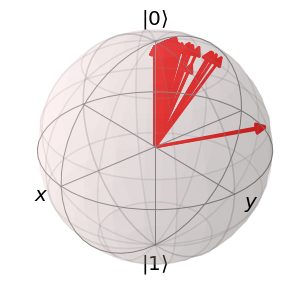

In [ ]:
#animate the above sequence on Bloch sphere

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        if i < len(results[j].states):
            state = results[j].states[i]
        elif i < len(results[j].states) + len(results1[j].states):
            state = results1[j].states[i - len(results[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states):
            state = results2[j].states[i - len(results[j].states) - len(results1[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states) + len(results3[j].states):
            state = results3[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states) + len(results3[j].states) + len(results4[j].states):
            state = results4[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states) - len(results3[j].states)]
        else:
            state = results5[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states) - len(results3[j].states) - len(results4[j].states)]
        
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(results[0].states) + len(results1[0].states) + len(results2[0].states) + len(results3[0].states) + len(results4[0].states) + len(results5[0].states)), init_func=init, blit=False, repeat=False)
ani.save('rabi_spin_echo_double_no_alt.mp4', fps=50, writer='ffmpeg')

In [13]:
#double rabi spin echo (XYX)(YXY) with decoherence in Y pulse.
n = 250 #number of spins
delta = 0.0 #detuning in units of rabi frequency
rabi0 = 1.0
rabi_sigma = 0.1*rabi0
rabi = np.random.normal(rabi0, rabi_sigma, n)
phi = 0.0*np.pi #phase of rabi frequency
pulse = np.pi/(2*rabi0)
ket_init = ket_g
results = []
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []

"""
# Plot the histogram of Rabi frequencies
plt.hist(rabi, bins='auto', edgecolor='black')
plt.xlabel('Rabi frequency')
plt.ylabel('Count')
plt.title('Rabi frequency distribution')
plt.show()
"""

for i in range(n):
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate = results[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    results1.append(sesolve(H, ket_intermediate, t, e_ops=[]))
    ket_intermediate1 = results1[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results2.append(sesolve(H, ket_intermediate1, t, e_ops=[]))
    ket_intermediate2 = results2[i].states[-1]

    #repeat the sequence but inverted so do YXY
    #first pi/2 pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results3.append(sesolve(H, ket_intermediate2, t, e_ops=[]))
    ket_intermediate3 = results3[i].states[-1]

    #pi pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 100)
    results4.append(sesolve(H, ket_intermediate3, t, e_ops=[]))
    ket_intermediate4 = results4[i].states[-1]

    #second pi/2 pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 100)
    results5.append(sesolve(H, ket_intermediate4, t, e_ops=[]))

/var/folders/31/m4kzls1x2ms3ys1t245y77j80000gn/T/ipykernel_29038/4232300383.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


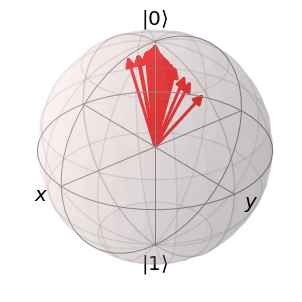

In [ ]:
#animate the results above on the Bloch sphere

fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30)
b = Bloch(axes=ax)

def animate(i):
    b.clear()
    for j in range(n):
        if i < len(results[j].states):
            state = results[j].states[i]
        elif i < len(results[j].states) + len(results1[j].states):
            state = results1[j].states[i - len(results[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states):
            state = results2[j].states[i - len(results[j].states) - len(results1[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states) + len(results3[j].states):
            state = results3[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states)]
        elif i < len(results[j].states) + len(results1[j].states) + len(results2[j].states) + len(results3[j].states) + len(results4[j].states):
            state = results4[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states) - len(results3[j].states)]
        else:
            state = results5[j].states[i - len(results[j].states) - len(results1[j].states) - len(results2[j].states) - len(results3[j].states) - len(results4[j].states)]
        
        b.add_states(state)
        
    b.make_sphere()
    return ax

def init():
    b.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(results[0].states) + len(results1[0].states) + len(results2[0].states) + len(results3[0].states) + len(results4[0].states) + len(results5[0].states)), init_func=init, blit=False, repeat=False)
ani.save('rabi_spin_echo_double_alt.mp4', fps=50, writer='ffmpeg')

In [14]:
#finally, let's compare the depletion and revival probabilities for all 3 cases: no spin echo, (XYX)(XYX) spin echo, and (XYX)(YXY) spin echo

n = 1000 #number of spins
delta = 0.0 #detuning in units of rabi frequency
rabi0 = 1.0
rabi_sigma = 0.5*rabi0
rabi = np.random.normal(rabi0, rabi_sigma, n)
phi = 0.0*np.pi #phase of rabi frequency
pulse = np.pi/(2*rabi0)
ket_init = ket_g
results1 = []
results2 = []

results11 = []
results12 = []
results13 = []
results14 = []
results15 = []
results16 = []

results21 = []
results22 = []
results23 = []
results24 = []
results25 = []
results26 = []

for i in range(n):
    #1. No spin echo
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 2)
    results1.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate = results1[i].states[-1]
    results2.append(sesolve(H, ket_intermediate, t, e_ops=[]))
    ket_final1 = results2[i].states[-1]

    #2. (XYX)(XYX) spin echo
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results11.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate1 = results11[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 2)
    results12.append(sesolve(H, ket_intermediate1, t, e_ops=[]))
    ket_intermediate2 = results12[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results13.append(sesolve(H, ket_intermediate2, t, e_ops=[]))
    ket_intermediate3 = results13[i].states[-1]

    #repeat the sequence
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results14.append(sesolve(H, ket_intermediate3, t, e_ops=[]))
    ket_intermediate4 = results14[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 2)
    results15.append(sesolve(H, ket_intermediate4, t, e_ops=[]))
    ket_intermediate5 = results15[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results16.append(sesolve(H, ket_intermediate5, t, e_ops=[]))
    ket_final2 = results16[i].states[-1]

    #3. (XYX)(YXY) spin echo
    #first pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results21.append(sesolve(H, ket_g, t, e_ops=[]))
    ket_intermediate6 = results21[i].states[-1]

    #pi pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 2)
    results22.append(sesolve(H, ket_intermediate6, t, e_ops=[]))
    ket_intermediate7 = results22[i].states[-1]

    #second pi/2 pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results23.append(sesolve(H, ket_intermediate7, t, e_ops=[]))
    ket_intermediate8 = results23[i].states[-1]

    #repeat the sequence but inverted so do YXY
    #first pi/2 pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results24.append(sesolve(H, ket_intermediate8, t, e_ops=[]))
    ket_intermediate9 = results24[i].states[-1]

    #pi pulse in x
    phi = 0.0*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, 2*pulse, 2)
    results25.append(sesolve(H, ket_intermediate9, t, e_ops=[]))
    ket_intermediate10 = results25[i].states[-1]

    #second pi/2 pulse in y
    phi = 0.5*np.pi #phase of rabi frequency
    H = delta*sigmaz()/2 + rabi[i]*sigmax()*np.cos(phi)/2 + rabi[i]*sigmay()*np.sin(phi)/2
    t = np.linspace(0, pulse, 2)
    results26.append(sesolve(H, ket_intermediate10, t, e_ops=[]))
    ket_final3 = results26[i].states[-1]

#compare the depletion and revival probabilities for all 3 cases
p_e_no_echo = [1/2*(1 - expect(sigmaz(), answers.states[-1])) for answers in results1]
p_g_no_echo = [1/2*(1 + expect(sigmaz(), answers.states[-1])) for answers in results2]
p_e_echo_no_alt = [1/2*(1 - expect(sigmaz(), answers.states[-1])) for answers in results13]
p_g_echo_no_alt = [1/2*(1 + expect(sigmaz(), answers.states[-1])) for answers in results16]
p_e_echo_alt = [1/2*(1 - expect(sigmaz(), answers.states[-1])) for answers in results23]
p_g_echo_alt = [1/2*(1 + expect(sigmaz(), answers.states[-1])) for answers in results26]

avg_p_e_no_echo = np.mean(p_e_no_echo)
avg_p_g_no_echo = np.mean(p_g_no_echo)
avg_p_e_echo_no_alt = np.mean(p_e_echo_no_alt)
avg_p_g_echo_no_alt = np.mean(p_g_echo_no_alt)
avg_p_e_echo_alt = np.mean(p_e_echo_alt)
avg_p_g_echo_alt = np.mean(p_g_echo_alt)

print('Depletion probability for no spin echo (%): ', np.round(avg_p_e_no_echo*100, 2))
print('Revival probability for no spin echo (%): ', np.round(avg_p_g_no_echo*100, 2))
print('Depletion probability for spin echo (XYX)(XYX) (%): ', np.round(avg_p_e_echo_no_alt*100, 2))
print('Revival probability for spin echo (XYX)(XYX) (%): ', np.round(avg_p_g_echo_no_alt*100, 2))
print('Depletion probability for spin echo (XYX)(YXY) (%): ', np.round(avg_p_e_echo_alt*100, 2))
print('Revival probability for spin echo (XYX)(YXY) (%): ', np.round(avg_p_g_echo_alt*100, 2))
    

Depletion probability for no spin echo (%):  64.77
Revival probability for no spin echo (%):  50.02
Depletion probability for spin echo (XYX)(XYX) (%):  77.26
Revival probability for spin echo (XYX)(XYX) (%):  65.88
Depletion probability for spin echo (XYX)(YXY) (%):  77.26
Revival probability for spin echo (XYX)(YXY) (%):  83.36
